In [1]:
import blur
import matplotlib.pyplot as plt

File accessed:  hico_data/H2014064000912.L1B_ISS.nc


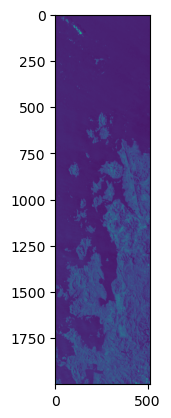

In [2]:
ba = blur.blurCube()

ba.get_cube()

ba.read_cube()

ba.visualize_cube()
